In [1]:
import numpy as np               # funções matemáticas
import matplotlib.pyplot as plt  # funções básicas para gráficos
import pandas as pd              # acesso e manipulação de dados
#import statistics as sta         # funções estatísticas
#import string as stg             # manipulação de strings

## Modelo 
### Curva IS

\begin{equation}
Y_t=C_t+I_t+G_t+X_t-M_t
\end{equation}
### Curva LM
\begin{equation}
i_t=\frac{k}{h}Y_t-\frac{1}{h}\overline{L}
\end{equation}

### 1) Declaração de Variáveis exógenas e Parâmetros

In [2]:
#Variáveis Exógenas Iniciais
C0 = 100    # consumo autonomo
I0 = 200    # investimento - fixo ou constante
T0 = 100    # tributos
G = 200     # gasto do governo - fixo ou constante
Zt = 5000   # PIB Internacional
E = 5.00    # taxa de câmbio (fixa)
X0 = 50     # exportações
x1 = 0.02   # parametro de exportação
x2 = 80     # parametro de exportação
M0 = 50     # importações

#Parâmetros Iniciais
m1 = 0.10   # parametro de importação
m2 = 50     # parametro de importação
c = 0.8     # propensão marginal a consumir
d = 0.05    
f = 2000    
h = 4000
tau = 0.05  # alíquota de imposto de renda
k = 10
L = 84000   # Quantidade de moeda em circulação
T = 200     # tributos - fixo ou constante

#Variáveis Endógenas
Y = []      # lista para armazenar os valores de Y(t)
C = []      # lista para armazenar os valores C(t)
D = []      # lista para armazenar dívida do governo no tempo
X = []      # lista para amarzenar valores de exportação no tempo
M = []      # lista para armzenar valores de importação no tempo
T = []      # lista para armazenar valores de tributos no tempo
Ld = []      #Lista para valores de demanda por moeda ao longo do tempo
Lo = []
i = []
time = 30   # total de iterações ou horizonte de tempo analisado


### 2) Equações Dinâmicas

In [15]:
def eqC(val):  # equação consumo
    _c = C0 + c*(val-T0)  # val = Renda = Y(t-1)
    C.append(_c)


def eqY():  # equação Renda
    _y = C[t] + I0 + G
    Y.append(_y)


def eqD(val):  # equação da dívida
    _d = val + T0 - G
    D.append(_d)

def eqLD():      #Equação demanda por moeda
    _L = h*Y - k*i
    Ld.append(_L)

def eqLO():     #Equação oferta por moeda
    _L = k*Y - h*i
    Ld.append(_L)
    
def eqX(val):  # equação de exportação
    _x = X0 +x1*val + x2*E
    X.append(_x)

def eqM(val):  # quação de importação
    _m = M0 + m1*val - m2*E
    M.append(_m)


### 3) Dinâmica: calculos iterados no tempo após um aumento permanente dos gastos do governo G = 220

In [8]:
# Inicia vetores em t=0, com valores iniciais(condições iniciais)
#variáveis da equação de equilíbrio
A = C0 - c*T0 + I0 + G + X0 - M0    # Curva IS

p = (1 - c*(1-tau) - d + m1)        # p = Deslocamento das curvas
sigma = 1 + ((f*k)/(p*h))           #
y_eq = (1/p*sigma)*(A + x1*Zt + (x2+m2)*E + f/h*L)       #Nova equação de equilíbrio
Y.append(y_eq)
i_eq = k/h * A - 1/h * L
i.append(i_eq)
c_eq = C0 + c * (y_eq - T0)
C.append(c_eq)
D.append(T0-G)
G = 220         # choque de política fiscal


In [17]:
# loop temporal (crial série temporada para cada variavel endógena)
for t in range(1, time):
    eqC(Y[t-1])
    eqY()
    eqD(D[t-1])
    eqX(Y[t-1])
    eqM(Y[t-1])
    eqL
    

#print(Y)
#print(C)
#print(D)
#print(X)
#print(M)


In [18]:
# juntar todas as listas e transformar em um dataframe
colunas = list(zip(Y, C, D, X, M))  # juntando
df = pd.DataFrame(colunas, columns=['Y', 'C', 'D','X','M'])  # conversão para dataframe
# exportando o arquivo para o formato .csv
df.to_csv('ModeloISLM-Resultado.csv')


In [ ]:
# plotando as informações até aqui
t = list(range(0, time))
plt.plot(t, Y, label="Y(t)", color='blue')
plt.plot(t, C, label='C(t)', color='red')
plt.legend(loc='upper left')
plt.show()


Text(0.5, 1.0, 'D(t)')

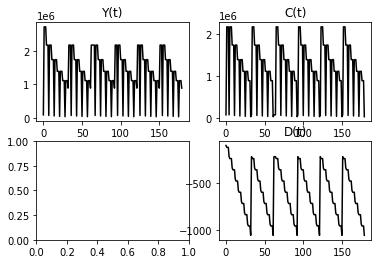

In [19]:
# Multiplos plots

# Initialise the subplot function us
figure, axis = plt.subplots(2, 2)
# Renda
axis[0, 0].plot(Y,label="Y(t)",color="black")    
axis[0, 0].set_title("Y(t)")
# Consumo
axis[0, 1].plot(C,label="C(t)",color='black')
axis[0, 1].set_title("C(t)")
# Dívida
axis[1, 1].plot(D,label="D(t)",color='black')
axis[1, 1].set_title("D(t)")